# Neural Network Shoulder Fly with Chat GPT

In [72]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Input
from keras.models import Model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os



In [73]:
# Scelta automatica del Path locale tra "paoloartasensi" o "lorenzobassetti"
path = '/Users/paoloartasensi/Python_Scripts/wow/'
isdir = os.path.isdir(path)
if isdir == True:
    path = '/Users/paoloartasensi/Python_Scripts/wow/'
else:
    path = '/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/wow/'

print(isdir)

True


In [74]:
df = pd.read_csv(path+'Gdrive_csv/shoulderfly_20221223_1019PM.csv')

In [75]:


# Extract the accelerometer and gyroscope data and labels from the dataframe
accelerometer_data = df[['Ax', 'Ay', 'Az']]
gyroscope_data = df[['Gx', 'Gy', 'Gz']]
pitch_data = df[['Pitch', 'Roll']]
labels = df['UP']


In [76]:
# Labels indicating whether the person is lifting arm (1) or not (0)
labels = np.where(df['UP'], 1, 0)


In [77]:

# Convert the labels to categorical format
labels = to_categorical(labels, num_classes=2)


# Concatenate the accelerometer and gyroscope data into a single array
sensor_data = np.concatenate((accelerometer_data, gyroscope_data, pitch_data), axis=1)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(sensor_data, labels, test_size=0.2)

# Define the model architecture
inputs = Input(shape=(8,))
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=predictions)
features = Dense(64, activation='relu')(x)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, batch_size=32, epochs=10)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, batch_size=32)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Epoch 1/10
2/2 [==============================] - 2s 10ms/step - loss: 17.3528 - accuracy: 0.1525
Epoch 2/10
2/2 [==============================] - 0s 9ms/step - loss: 12.0966 - accuracy: 0.1695
Epoch 3/10
2/2 [==============================] - 0s 11ms/step - loss: 7.4383 - accuracy: 0.2712
Epoch 4/10
2/2 [==============================] - 0s 9ms/step - loss: 4.2133 - accuracy: 0.5593
Epoch 5/10
2/2 [==============================] - 0s 10ms/step - loss: 2.2453 - accuracy: 0.6610
Epoch 6/10
2/2 [==============================] - 0s 11ms/step - loss: 0.9676 - accuracy: 0.8475
Epoch 7/10
2/2 [==============================] - 0s 14ms/step - loss: 0.6488 - accuracy: 0.8983
Epoch 8/10
2/2 [==============================] - 0s 6ms/step - loss: 0.5459 - accuracy: 0.9322
Epoch 9/10
2/2 [==============================] - 0s 10ms/step - loss: 0.4430 - accuracy: 0.9322
Epoch 10/10
1/1 [==============================] - 0s 414ms/step - loss: 0.3801 - accuracy: 0.9333
Test loss: 0.3801432847976684

In [78]:


# Use the model to make predictions on new data
#new_data = ...
#predictions = model.predict(new_data)


In [79]:
# Define the model architecture
inputs = Input(shape=(8,))
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
features = Dense(64, activation='relu')(x)

# Extract the features from the training data
X_train_features = Model(inputs=inputs, outputs=features)

Epoch 1/10
1/1 [==============================] - 0s 258ms/step - loss: 0.1883 - accuracy: 0.9492 - val_loss: 0.3600 - val_accuracy: 0.9333
Epoch 2/10
1/1 [==============================] - 0s 105ms/step - loss: 0.1365 - accuracy: 0.9492 - val_loss: 0.3349 - val_accuracy: 0.9333
Epoch 3/10
1/1 [==============================] - 0s 96ms/step - loss: 0.0913 - accuracy: 0.9492 - val_loss: 0.3047 - val_accuracy: 0.9333
Epoch 4/10
1/1 [==============================] - 0s 128ms/step - loss: 0.0569 - accuracy: 0.9831 - val_loss: 0.2730 - val_accuracy: 0.9333
Epoch 5/10
1/1 [==============================] - 0s 336ms/step - loss: 0.0330 - accuracy: 0.9831 - val_loss: 0.2413 - val_accuracy: 0.9333
Epoch 6/10
1/1 [==============================] - 0s 175ms/step - loss: 0.0173 - accuracy: 0.9831 - val_loss: 0.2110 - val_accuracy: 0.9333
Epoch 7/10
1/1 [==============================] - 0s 122ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.1825 - val_accuracy: 0.9333
Epoch 8/10
1/1 [=====

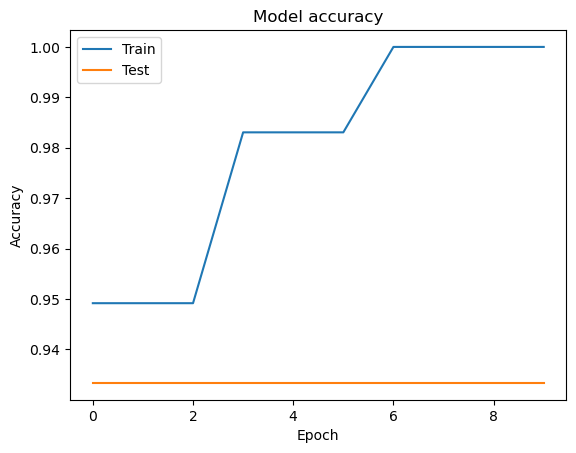

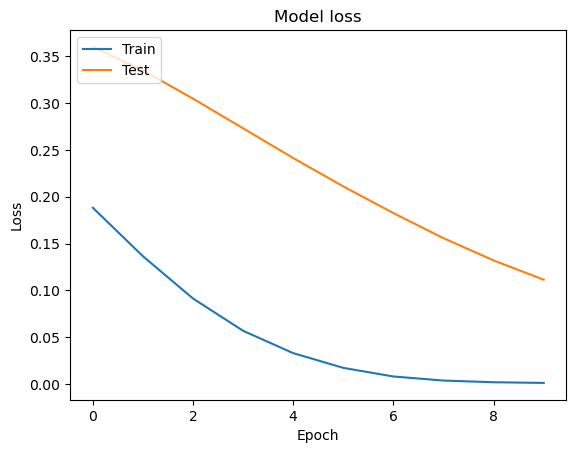

1/1 [==============================] - 1s 640ms/step


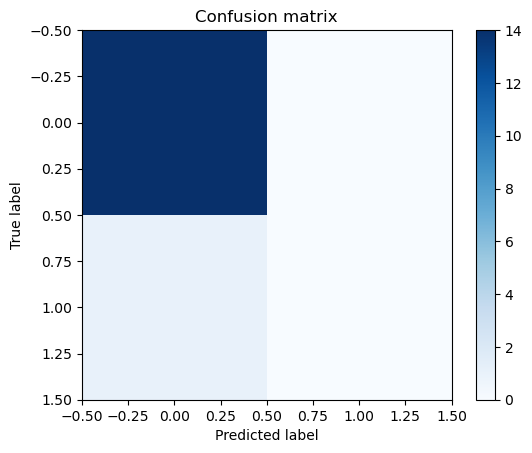

In [80]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), verbose=1)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot the training and test accuracy over the course of training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and test loss over the course of training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the confusion matrix
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
confusion_matrix = confusion_matrix(y_true, y_pred)
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
